In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [18]:
class_names = ["T=shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [20]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [21]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 25s 29ms/step - loss: 0.8775 - accuracy: 0.6987 - val_loss: 0.7581 - val_accuracy: 0.7340
Epoch 2/30
860/860 [==============================] - 27s 32ms/step - loss: 0.5389 - accuracy: 0.8049 - val_loss: 0.4946 - val_accuracy: 0.8162
Epoch 3/30
860/860 [==============================] - 26s 30ms/step - loss: 0.4812 - accuracy: 0.8261 - val_loss: 0.9108 - val_accuracy: 0.7126
Epoch 4/30
860/860 [==============================] - 26s 30ms/step - loss: 0.4438 - accuracy: 0.8415 - val_loss: 0.4131 - val_accuracy: 0.8568
Epoch 5/30
860/860 [==============================] - 24s 28ms/step - loss: 0.4197 - accuracy: 0.8499 - val_loss: 0.4364 - val_accuracy: 0.8480
Epoch 6/30
860/860 [==============================] - 24s 28ms/step - loss: 0.3957 - accuracy: 0.8581 - val_loss: 0.3770 - val_accuracy: 0.8716
Epoch 7/30
860/860 [==============================] - 23s 26ms/step - loss: 0.3781 - accuracy: 0.8662 - val_loss: 0.4068 - val_accuracy:

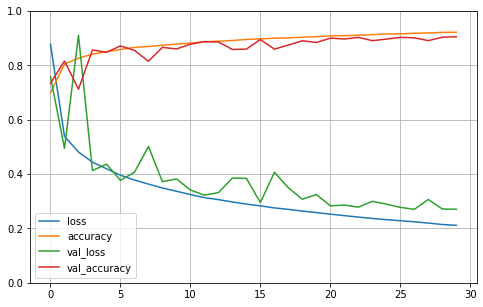

In [27]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2800 - accuracy: 0.8997A: 0s - los


In [29]:
ev

[0.2799721360206604, 0.8996999859809875]

In [30]:
X_new = X_test[:3]

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [32]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


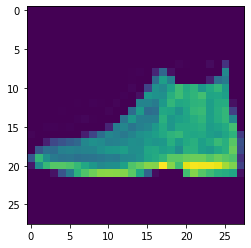

In [33]:
print(plt.imshow(X_test[0].reshape((28,28))))